In [23]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**8 + c**2*b

print(diff(f, a))

8*a**7 + 5*b - cos(c)


In [24]:
import numpy as np
A = np.array([
    [-6, -12],
    [-12, -6]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)

In [25]:
eig_values

array([  6., -18.])

In [26]:
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(8*x-6*y-34, 0)
eq2 = Eq(-6*x+10*y+42, 0)
 
sol = solve([eq1, eq2], [x, y])

In [27]:
sol

{x: 2, y: -3}

In [28]:
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(3*x**2-3*y, 0)
eq2 = Eq(3*y**2-3*x, 0)
 
sol = solve([eq1, eq2], [x, y])
sol

[(0, 0),
 (1, 1),
 ((-1/2 - sqrt(3)*I/2)**2, -1/2 - sqrt(3)*I/2),
 ((-1/2 + sqrt(3)*I/2)**2, -1/2 + sqrt(3)*I/2)]

In [29]:
import numpy as np
A = np.array([
    [6, -3],
    [-3, 6]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
eig_values

array([9., 3.])

  7. Градиент и градиентный спуск

In [30]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [31]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [32]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [36]:
import matplotlib.pyplot as plt

In [37]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

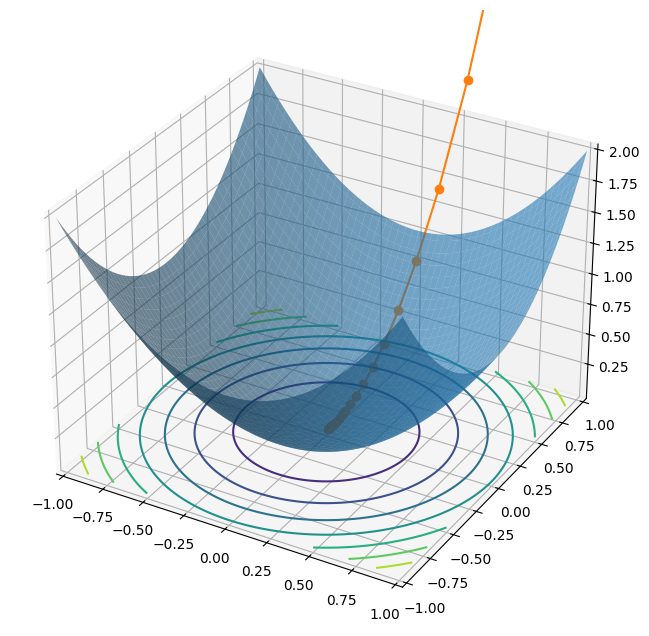

In [38]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

8. Практика: градиентный спуск

In [8]:
def f(x, y):
    return 2*x**2 - 4*x*y +y**4 + 2
def grad(x, y):
    dx = 4 * x - 4*y
    dy = -4*x + 4*y**3
    return (dx, dy)

In [15]:
x0 = (20, 20)
gamma = 0.001
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    if i > 50000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.4f}, {x_cur[1]:.4f});"
          f" f(x)={f(*x_cur):.4f}; grad f(x)=({grad(*x_cur)[0]:.4f}, {grad(*x_cur)[1]:.4f})")

iter=1; x=(20.0000, -11.9200); f(x)=21944.1451; grad f(x)=(127.6800, -6854.6796)
iter=2; x=(19.8723, -5.0653); f(x)=1852.7627; grad f(x)=(99.7506, -599.3425)
iter=3; x=(19.7726, -4.4660); f(x)=1534.9258; grad f(x)=(96.9542, -435.3853)
iter=4; x=(19.6756, -4.0306); f(x)=1357.3993; grad f(x)=(94.8248, -340.6213)
iter=5; x=(19.5808, -3.6900); f(x)=1243.2174; grad f(x)=(93.0830, -279.2921)
iter=6; x=(19.4877, -3.4107); f(x)=1162.7272; grad f(x)=(91.5935, -236.6529)
iter=7; x=(19.3961, -3.1740); f(x)=1102.1680; grad f(x)=(90.2806, -205.4906)
iter=8; x=(19.3058, -2.9685); f(x)=1054.3256; grad f(x)=(89.0975, -181.8607)
iter=9; x=(19.2167, -2.7867); f(x)=1015.0729; grad f(x)=(88.0136, -163.4273)
iter=10; x=(19.1287, -2.6232); f(x)=981.8876; grad f(x)=(87.0079, -148.7217)
iter=11; x=(19.0417, -2.4745); f(x)=953.1452; grad f(x)=(86.0650, -136.7757)
iter=12; x=(18.9556, -2.3378); f(x)=927.7546; grad f(x)=(85.1736, -126.9265)
iter=13; x=(18.8705, -2.2108); f(x)=904.9569; grad f(x)=(84.3252, -118.7

In [16]:
def f(x, y, z):
    return x**3 - 2*x**2 + y**2 +z**2 - 2*x*y + x*z -y*z +3*z
def grad(x, y, z):
    dx = 3*x**2 - 4*x - 2*y + z
    dy = 2*y -2*x - z
    dz = 2*z + x - y + 3
    return (dx, dy, dz)

In [23]:
x0 = (100, 100, 20)
gamma = 0.001
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1],
            x_cur[2] - gamma * grad(*x_cur)[2])
    if i > 10000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.4f}, {x_cur[1]:.4f});"
          f" f(x)={f(*x_cur):.4f}; grad f(x)=({grad(*x_cur)[0]:.4f}, {grad(*x_cur)[1]:.4f})")

iter=1; x=(70.5800, 100.0200); f(x)=337389.5623; grad f(x)=(14482.2062, 38.9230)
iter=2; x=(56.0978, 99.9811); f(x)=168604.8942; grad f(x)=(9036.4776, 67.8230)
iter=3; x=(47.0613, 99.9133); f(x)=99782.4085; grad f(x)=(6276.1752, 85.7594)
iter=4; x=(40.7851, 99.8275); f(x)=65618.7359; grad f(x)=(4647.4421, 98.1302)
iter=5; x=(36.1377, 99.7294); f(x)=46508.2963; grad f(x)=(3593.7609, 107.2127)
iter=6; x=(32.5439, 99.6222); f(x)=34908.3508; grad f(x)=(2867.8949, 114.1652)
iter=7; x=(29.6760, 99.5080); f(x)=27432.1744; grad f(x)=(2344.2978, 119.6485)
iter=8; x=(27.3317, 99.3883); f(x)=22386.2022; grad f(x)=(1953.0114, 124.0710)
iter=9; x=(25.3787, 99.2643); f(x)=18852.8671; grad f(x)=(1652.2681, 127.6999)
iter=10; x=(23.7265, 99.1366); f(x)=16303.0537; grad f(x)=(1415.7584, 130.7183)
iter=11; x=(22.3107, 99.0058); f(x)=14415.9874; grad f(x)=(1226.1825, 133.2562)
iter=12; x=(21.0845, 98.8726); f(x)=12989.0281; grad f(x)=(1071.7558, 135.4086)
iter=13; x=(20.0128, 98.7372); f(x)=11889.6706; g